In [74]:
from bs4 import BeautifulSoup
import sys, urllib.request
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from collections import Counter
%matplotlib inline

In [75]:
rank_no=[]
artist=[]
music=[]
twitter=[]

In [76]:
def get_single_item_data(item_url, number_start =0,num_end =100):
        source_code = urllib.request.urlopen(item_url)  # get all source code
        source_text = source_code.read()
        #plain_text = source_text.decode('utf-8')
        #output = open('plain_text','w+')
        #output.write(plain_text)
        #output.close()
        soup = BeautifulSoup(source_text,"html.parser")
        #toplist = soup.find_all('table',{'class':'smv'}).find_all("tr")[0].find_all("td")td[3]
        toplist = soup.find_all('table',{'class':'smv'})
        Top_Emerging = toplist[0] # Emerging
        Top_Trending = toplist[1] # Trending updating fast in 6 seconds
        Top_Overall = toplist[2] # overall Comprehensive result
        #print(toplist[2])
        rank_list = toplist[1].find_all('tr')
        for rank in rank_list[number_start:num_end]:
            rank_no.append(rank.find_all('td')[0].text)
            artist.append(rank.find_all('td')[1].text)
            music_text = rank.find_all('td')[2].text
            music.append(music_text[0:(music_text.find("\n"))-1])
            twitter.append(rank.find_all('td')[1].find('a').get("href"))
        for i in np.arange(len(artist)).tolist()[number_start:number_start+5]:
            print("ranking No:"+str(i+1)+"   artist:"+artist[i]+"  music:"+music[i]+'\n')
            print(twitter[i]+'\n')


In [77]:
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$  11-30 song and Singers need to be promoted  $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\n")
get_single_item_data("http://realtime.billboard.com/?chart=trending140", 20, 40)

In [78]:
Top_Trending_df = pd.DataFrame({'No_':rank_no, 'artist': artist, 'music':music, 'Twitter':twitter})

In [79]:
def addprice_discount_pd (raw_pd, price_low, price_high):
    pd_length = len(list(raw_pd.index))
    price = ['{0:.2f}'.format(np.random.uniform(price_low,price_high)) for i in list(range(pd_length))]  
    # price distribution can be optimized currently uniform
    discount =['{0:.1f}'.format(1.01-0.01*int(rank)) for rank in list(raw_pd.No_)]  # discount will be optimized later
    raw_pd["price"] = pd.Series(price, index=raw_pd.index)
    raw_pd["discount"] = pd.Series(discount, index=raw_pd.index)
    return 
  

In [80]:
addprice_discount_pd(Top_Trending_df, 8,10)

In [81]:
Top_Trending_df

,No_,Twitter,artist,music,price,discount
0,21,http://twitter.com/YoungJeezy,Young Jeezy,Sweet Life (feat. Janelle Monáe),9.34,0.8
1,22,http://twitter.com/Slayer,Slayer,Repentless,9.98,0.8
2,23,http://twitter.com/leonbridges,Leon Bridges,Coming Home,9.01,0.8
3,24,http://twitter.com/theweeknd,The Weeknd,Can't Feel My Face,9.17,0.8
4,25,http://twitter.com/lildickytweets,Lil Dicky,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,9.52,0.8
5,26,http://twitter.com/chrisbrown,Chris Brown,Zero,8.45,0.8
6,27,http://twitter.com/MarinasDiamonds,Marina and The Diamonds,FROOT,9.89,0.7
7,28,http://twitter.com/LukeBryanOnline,Luke Bryan,Home Alone Tonight (feat. Karen Fairchild),9.17,0.7
8,29,http://twitter.com/RoyWoods_,Roy Wood$,Drama,9.26,0.7
9,30,http://twitter.com/TheChainsmokers,The Chainsmokers,Roses (feat. ROZES),8.67,0.7


In [70]:
Top_Trending_df.describe()

,No_,Twitter,artist,music,price,discount
count,20,20,20,20,20,20
unique,20,17,17,20,19,3
top,27,http://twitter.com/selenagomez,Selena Gomez,Remember,8.22,0.7
freq,1,3,3,1,2,10


------------top 20 songs------17 singers in total---------


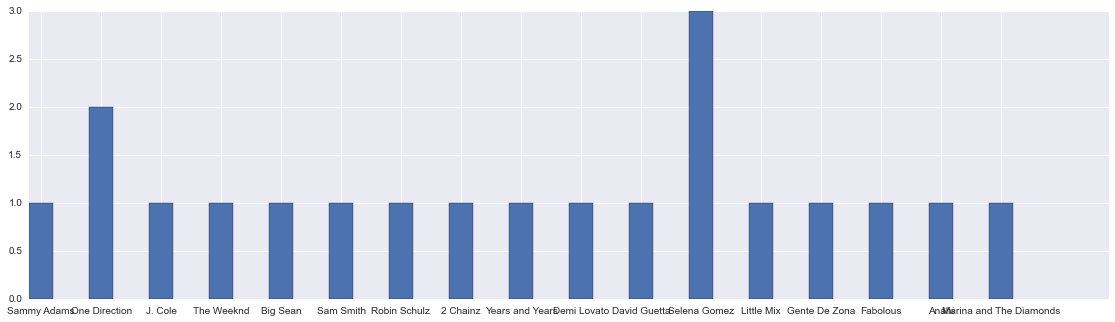

In [71]:
count = dict(Counter(artist))
#print(count)

xVals = list(count.keys())
yVals = list(count.values())
print("------------top 20 songs------"+str(len(np.unique(xVals)))+" singers in total---------")
#print(np.unique(xVals))
x = tuple(np.arange(len(xVals)))
width = 0.4
ax = plt.subplot(111)
ax.set_position([5,2,2.5,1])
ax.bar(x, yVals, width)
ax.set_xticks([i+width/2 for i in x])
ax.set_xticklabels(xVals)
plt.rcParams['font.size'] = 80


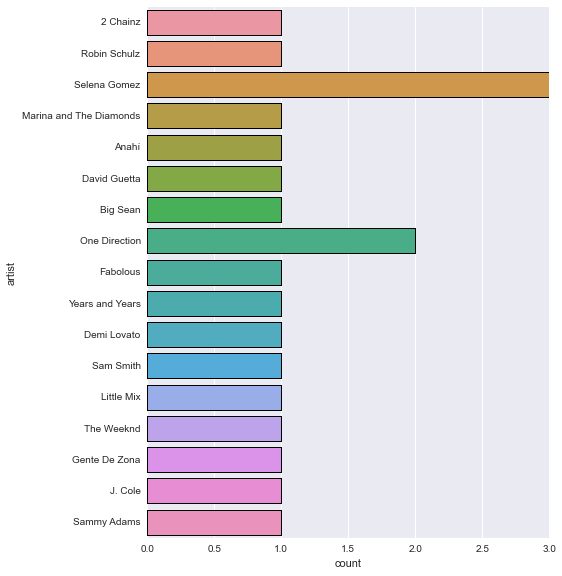

In [72]:
sns.factorplot(y='artist', data=Top_Trending_df, kind='count',size=10,linewidth=1)

In [73]:
Top_Trending_df.to_csv("Top_Trending_top20_40_price_discount.csv", index=False)